<a href="https://colab.research.google.com/github/luanbezerra/Projeto-de-Estatistica/blob/main/statik.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#leitura de dados

In [ ]:
#importando bibliotecas necessarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [ ]:
#leitura de dados
df = pd.read_csv("/content/cmc.data")
df

,Wife_age,Wife_educ,Husband_educ,Num_Born_Kids,Wife_religion,Wife_working,Husband_occupation,Std_Living_idx,Media_Exposure,Contraceptive_Method
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1
...,...,...,...,...,...,...,...,...,...,...
1468,33,4,4,2,1,0,2,4,0,3
1469,33,4,4,3,1,1,1,4,0,3
1470,39,3,3,8,1,0,1,4,0,3
1471,33,3,3,4,1,0,2,2,0,3


# DEA

<Axes: xlabel='Contraceptive_Method', ylabel='count'>

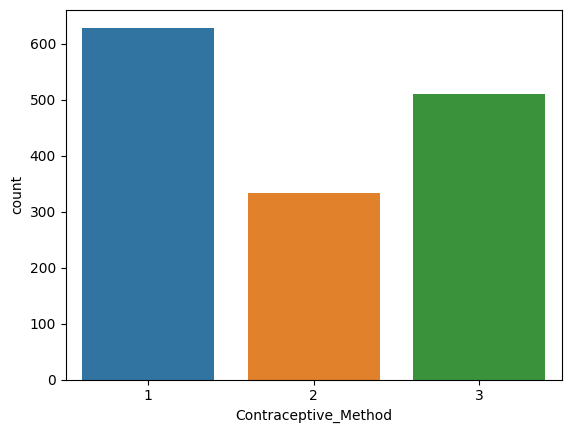

In [ ]:
#checkando o balanceamento do dataset
sns.countplot(x = df["Contraceptive_Method"])

In [ ]:
df.isnull().sum() #checking for total null values


Wife_age                0
Wife_educ               0
Husband_educ            0
Num_Born_Kids           0
Wife_religion           0
Wife_working            0
Husband_occupation      0
Std_Living_idx          0
Media_Exposure          0
Contraceptive_Method    0
dtype: int64

In [ ]:
df.describe()

,Wife_age,Wife_educ,Husband_educ,Num_Born_Kids,Wife_religion,Wife_working,Husband_occupation,Std_Living_idx,Media_Exposure,Contraceptive_Method
count,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000
mean,32.538357,2.958588,3.429735,3.261371,0.850645,0.749491,2.137814,3.133741,0.073999,1.919891
std,8.227245,1.014994,0.816349,2.358549,0.356559,0.433453,0.864857,0.976161,0.261858,0.876376
min,16.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
25%,26.000000,2.000000,3.000000,1.000000,1.000000,0.000000,1.000000,3.000000,0.000000,1.000000
50%,32.000000,3.000000,4.000000,3.000000,1.000000,1.000000,2.000000,3.000000,0.000000,2.000000
75%,39.000000,4.000000,4.000000,4.000000,1.000000,1.000000,3.000000,4.000000,0.000000,3.000000
max,49.000000,4.000000,4.000000,16.000000,1.000000,1.000000,4.000000,4.000000,1.000000,3.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Wife_age              1473 non-null   int64
 1   Wife_educ             1473 non-null   int64
 2   Husband_educ          1473 non-null   int64
 3   Num_Born_Kids         1473 non-null   int64
 4   Wife_religion         1473 non-null   int64
 5   Wife_working          1473 non-null   int64
 6   Husband_occupation    1473 non-null   int64
 7   Std_Living_idx        1473 non-null   int64
 8   Media_Exposure        1473 non-null   int64
 9   Contraceptive_Method  1473 non-null   int64
dtypes: int64(10)
memory usage: 115.2 KB


#Tratamento dos dados

#feature engineering
  transformar os dados categoricos em dados binarios usando one hot encoding
  

##Normalizacao
normalizar todo o **dataset**
-- normalizar os valores numericos pra ficar de 0 a 1


In [ ]:
df

,Wife_age,Wife_educ,Husband_educ,Num_Born_Kids,Wife_religion,Wife_working,Husband_occupation,Std_Living_idx,Media_Exposure,Contraceptive_Method
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1
...,...,...,...,...,...,...,...,...,...,...
1468,33,4,4,2,1,0,2,4,0,3
1469,33,4,4,3,1,1,1,4,0,3
1470,39,3,3,8,1,0,1,4,0,3
1471,33,3,3,4,1,0,2,2,0,3


In [ ]:
std = StandardScaler()
std.fit(df)
df_norm = std.transform(df)

In [ ]:
df_norm

array([[-1.03816735, -0.94474773, -0.52659022, ..., -0.13705337,
        -0.28268715, -1.05001034],
       [ 1.51519439, -1.93030964, -0.52659022, ...,  0.88771624,
        -0.28268715, -1.05001034],
       [ 1.27201708, -0.94474773, -0.52659022, ...,  0.88771624,
        -0.28268715, -1.05001034],
       ...,
       [ 0.78566246,  0.04081417, -0.52659022, ...,  0.88771624,
        -0.28268715,  1.23289037],
       [ 0.05613054,  0.04081417, -0.52659022, ..., -1.16182298,
        -0.28268715,  1.23289037],
       [-1.88928793,  0.04081417, -0.52659022, ...,  0.88771624,
        -0.28268715,  1.23289037]])

# Split do dataset
-- separar var target

In [ ]:
y = df["Contraceptive_Method"]
X = df.drop("Contraceptive_Method", axis = 1)
#print(y)
print(X)

      Wife_age  Wife_educ  Husband_educ  Num_Born_Kids  Wife_religion  \
0           24          2             3              3              1   
1           45          1             3             10              1   
2           43          2             3              7              1   
3           42          3             2              9              1   
4           36          3             3              8              1   
...        ...        ...           ...            ...            ...   
1468        33          4             4              2              1   
1469        33          4             4              3              1   
1470        39          3             3              8              1   
1471        33          3             3              4              1   
1472        17          3             3              1              1   

      Wife_working  Husband_occupation  Std_Living_idx  Media_Exposure  
0                1                   2            

In [ ]:
#split do dataset

# Treinamento

# Teste

# Acuracia